# Алгоритмы кластеризации кластеризации в дистрибутивной семантике

*Программа демонстрирует применение алгоритмов четкой **k-means (KM)** и нечеткой **c-means (FCM)** кластеризации для группировки слов, которые встречаются в схожем контексте повествования. Слова русского языка моделируются с помощью векторов (размерность которых много меньше словаря), полученных в результате работы нейросетевого алгоритма дистрибутивной семантики **word2vec (skip-gram)**.*

Для анализа используются модели дистрибутивной семантики **word2vec (skip-gram)**, построенные на основе заметок о банках () и телекоммуникационных компаниях ().
Данные взяты с официального сайта конференции **ДИАЛОГ-21** (Источник: *Loukachevitch N.V., Blinov P.D., Kotelnikov E.V., Rubtsova Yu.V., Ivanov V.V., Tutubalina E. (2015), SentiRuEval: Testing Object-oriented Sentiment Analysis Systems in Russian, Proceedings of International Conference Dialog.*).

Были подготовлены модели со следующими параметрами:
- Размерность вектора признаков - 300, минимальное число вхождений слова - 20, размер контекстного окна - 10.
    - Банки - 300features_20minwords_10context_bank
    - Телекоммуникационные компании  - 300features_20minwords_10context_ttk
    - Банки и телекоммуникационные компании - 300features_20minwords_10context_full
- Размерность вектора признаков - 300, минимальное число вхождений слова - 40, размер контекстного окна - 10.
    - Банки - 300features_40minwords_10context_bank
    - Телекоммуникационные компании  - 300features_40minwords_10context_ttk
    - Банки и телекоммуникационные компании - 300features_40minwords_10context_full

Также рассмотрены более масштабные модели, обученные на больших корпусах текстовых данных (Источник: ).
- 1
- 2

Импорт библиотеки с алгоритмами дистрибутивной семантики (в частности word2vec) (Источник: https://radimrehurek.com/gensim).

In [9]:
from gensim.models import Word2Vec

Загрузка модели и вывод нескольких слов.

In [10]:
model = Word2Vec.load("models/300features_40minwords_10context_full")

In [11]:
word_vectors = model.syn0
words = model.index2word

In [20]:
for ix, word in enumerate(words[:3]):
    print word
    print word_vectors[ix]

нормальный
[  7.35972300e-02  -1.73721258e-02  -8.33373237e-03  -8.55356082e-02
  -8.18823725e-02   1.52632017e-02   3.70077789e-02  -2.36464497e-02
  -8.25332012e-03  -1.67435464e-02  -6.60241768e-02   2.79846117e-02
   9.24787205e-03  -3.98905426e-02   3.57231218e-03  -5.00013679e-02
  -7.53037184e-02  -6.64497772e-03   4.34193164e-02  -4.20427360e-02
  -3.90998134e-03   1.52086198e-01   2.85693025e-03  -5.56157716e-02
  -2.46287418e-05  -5.23237512e-02   1.64605714e-02  -1.01002485e-01
  -1.90105531e-02   2.37178952e-02  -2.95395125e-02  -3.49427164e-02
   2.28135344e-02   4.73731421e-02  -3.56218293e-02  -1.12824179e-01
  -8.25599357e-02   4.29842509e-02  -1.60296366e-03  -5.57542369e-02
   1.97009277e-02   3.87912430e-02  -5.26472777e-02  -7.46402517e-02
   1.53806049e-03  -6.20090254e-02   5.13784289e-02   3.92956845e-02
   4.71740924e-02  -3.27854529e-02   2.73281969e-02  -5.38330600e-02
   4.87867035e-02  -3.58040631e-02  -4.64336313e-02   7.46139288e-02
   8.88025388e-02   2.9

Представление слов модели на плоскости, с помощью метода главных компонент (PCA).

In [21]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components)
pca_vectors = pca.fit_transform(word_vectors)

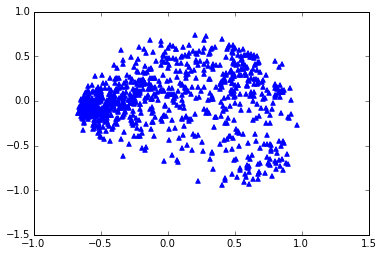

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(pca_vectors[:, 0],
            pca_vectors[:, 1],
            marker='^',
            color='b')

Положение первых 100 слов.

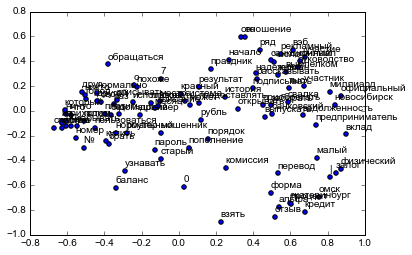

In [30]:
from matplotlib import rc
rc('font', family='Arial')
plt.scatter(pca_vectors[:100, 0],
            pca_vectors[:100, 1])
for label, x, y in zip(words, pca_vectors[:100, 0], pca_vectors[:100, 1]):
    plt.annotate(
        label,
        (x, y),
        xytext=(0, 3),
        textcoords = 'offset points', 
        ha = 'left', 
        va = 'bottom'
    )